In [27]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
in_dir='/Users/aidasaglinskas/Desktop/roi_paper_data/'
code_root = '/Users/aidasaglinskas/Desktop/BC-ASD-FC/'
#in_dir = '/gsfs0/data/aglinsai/roi_paper_data'
#code_root = '/gsfs0/data/aglinsai/BC-ASD-FC'

csv_fn = os.path.join(code_root,'Excel','DS-use.csv')
rdf_fn = os.path.join(code_root,'Data','RoiNames.xlsx')

temp = os.listdir(in_dir)

cmat_files = [file for file in temp if 'cmat' in file]
proportion_files = [file for file in temp if 'proportion' in file]
subs_files = [file for file in temp if 'subs' in file]
cmat_files.sort()
proportion_files.sort()
subs_files.sort()

#[print(file) for file in cmat_files]
[print('|'.join([str(i),cmat_files[i]])) for i in range(len(cmat_files))];
print('______\n')
#[print(file) for file in proportion_files]
[print('|'.join([str(i),proportion_files[i]])) for i in range(len(proportion_files))];
print('______\n')
#[print(file) for file in subs_files]
[print('|'.join([str(i),subs_files[i]])) for i in range(len(subs_files))];

0|mv2Mask_3001_cmats_126_task-face.npz
1|pmask2_3001_cmats_121_task-rest.npz
2|pmask_3001_cmats_127_task-face.npz
3|pmask_3001_cmats_127_task-rest.npz
4|rMask_3001_cmats_105_task-rest.npz
5|rfx2Mask_3001_cmats_12_task-face.npz
6|rfx2Mask_501_cmats_16_task-face.npz
7|rfx2Mask_501_cmats_16_task-rest.npz
8|rfx2Mask_501_cmats_20_task-face.npz
9|rfx2Mask_501_cmats_22_task-face.npz
______

0|mv2Mask_3001_proportionMat_126_task-face.npz
1|pmask2_3001_proportionMat_121_task-rest.npz
2|pmask_3001_proportionMat_127_task-face.npz
3|pmask_3001_proportionMat_127_task-rest.npz
4|rMask_3001_proportionMat_105_task-rest.npz
5|rfx2Mask_3001_proportionMat_12_task-face.npz
6|rfx2Mask_501_proportionMat_16_task-face.npz
7|rfx2Mask_501_proportionMat_16_task-rest.npz
8|rfx2Mask_501_proportionMat_20_task-face.npz
9|rfx2Mask_501_proportionMat_22_task-face.npz
______

0|mv2Mask_3001_subs_126_task-face.npz
1|pmask2_3001_subs_121_task-rest.npz
2|pmask_3001_subs_127_task-face.npz
3|pmask_3001_subs_127_task-rest.npz

In [29]:
i = 3

cmat_fn = os.path.join(in_dir,cmat_files[i])
proportionMat_fn = os.path.join(in_dir,proportion_files[i])
subs_fn = os.path.join(in_dir,subs_files[i])
cmats = np.load(cmat_fn)
proportionMat = np.load(proportionMat_fn)
subs = np.load(subs_fn)

subs=subs['arr_0']
proportionMat = proportionMat['arr_0']
cmats = cmats['arr_0']

print(cmat_fn)
print(cmats.shape)
print(proportionMat_fn)
print(proportionMat.shape)
print(subs_fn)
print(subs.shape)

def get_df(subs):
    csv_fn='/Users/aidasaglinskas/Desktop/BC-ASD-FC/Excel/DS-use.csv'
    df = pd.read_csv(csv_fn)
    slice_vec = [np.array(df['BIDS ID'])[sub] in subs for sub in range(len(df))]
    df=df = df[slice_vec]
    df = df.reset_index()
    print(all([df['BIDS ID'][sub]==subs[sub] for sub in range(len(subs))]))
    
    return df

df = get_df(subs)
print(len(df))

df.columns
df.groupby('family_type').count()
dfo=df

vec = [s in ['16p-duplication','16p-deletion','non-familial-control'] for s in np.array(dfo['family_type']) ]
#bad_subs = ['sub-008','sub-012','sub-040','sub-044','sub-057','sub-076','sub-101','sub-117','sub-133','sub-138','sub-144','sub-153','sub-156','sub-160','sub-185','sub-191','sub-238','sub-239','sub-265','sub-291','sub-293','sub-314','sub-315','sub-317','sub-326']
bad_subs = ['sub-008','sub-040','sub-057','sub-117','sub-138','sub-156','sub-185','sub-265','sub-291','sub-293','sub-314']
vec = [df['BIDS ID'][s] not in bad_subs and vec[s] for s in range(len(vec))]

def slice_data(vec):
    '''proportionMat2,cmats2,df2'''
    proportionMat2=proportionMat[vec,:,:]
    cmats2=cmats[vec,:,:]
    subs2=subs[vec]
    df2 = get_df(subs2)
    return proportionMat2,cmats2,subs2,df2

proportionMat,cmats,subs,df = slice_data(vec)


print(len(df))

/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_cmats_127_task-rest.npz
(127, 51, 51, 51)
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_proportionMat_127_task-rest.npz
(127, 51, 51)
/Users/aidasaglinskas/Desktop/roi_paper_data/pmask_3001_subs_127_task-rest.npz
(127,)
True
127
True
106


In [30]:
nsubs=cmats.shape[0]
nmasks=cmats.shape[1]
conn=np.zeros((nsubs,nmasks,1275))

for s in range(nsubs):
    for m in range(nmasks):
        conn[s,m,:]=cmats[s,m,:,:][np.triu_indices(51,1)]

In [31]:
print(np.array(df['BIDS ID']))

['sub-004' 'sub-012' 'sub-014' 'sub-018' 'sub-025' 'sub-029' 'sub-030'
 'sub-039' 'sub-042' 'sub-043' 'sub-044' 'sub-058' 'sub-064' 'sub-066'
 'sub-074' 'sub-076' 'sub-090' 'sub-091' 'sub-097' 'sub-098' 'sub-101'
 'sub-120' 'sub-122' 'sub-125' 'sub-133' 'sub-142' 'sub-143' 'sub-144'
 'sub-145' 'sub-148' 'sub-153' 'sub-154' 'sub-155' 'sub-158' 'sub-159'
 'sub-160' 'sub-162' 'sub-163' 'sub-166' 'sub-167' 'sub-171' 'sub-175'
 'sub-177' 'sub-178' 'sub-181' 'sub-190' 'sub-191' 'sub-201' 'sub-203'
 'sub-204' 'sub-205' 'sub-207' 'sub-212' 'sub-226' 'sub-227' 'sub-228'
 'sub-229' 'sub-230' 'sub-237' 'sub-238' 'sub-239' 'sub-240' 'sub-242'
 'sub-244' 'sub-245' 'sub-252' 'sub-253' 'sub-257' 'sub-258' 'sub-259'
 'sub-262' 'sub-264' 'sub-270' 'sub-272' 'sub-273' 'sub-274' 'sub-275'
 'sub-276' 'sub-279' 'sub-280' 'sub-284' 'sub-285' 'sub-286' 'sub-287'
 'sub-290' 'sub-294' 'sub-295' 'sub-296' 'sub-300' 'sub-309' 'sub-313'
 'sub-315' 'sub-316' 'sub-317' 'sub-318' 'sub-320' 'sub-323' 'sub-324'
 'sub-

In [32]:
df.groupby('family_type').count()

,index,BIDS ID,SVIP ID,FCAP1,SCAP1,SCAP2,ados_css,ados_module,age_months,best_full_scale_iq,...,rrb_css,sa_css,sex,svip_diagnosis_m1,svip_neuro_exam.background.head_circum,svip_neuro_exam.background.head_circum_perc,svip_neuro_exam.background.head_circum_z_score,svip_neuro_exam.measure.eval_age_months,svip_neuro_exam.measure.measure_type,age_years
family_type,,,,,,,,,,,,,,,,,,,,,
16p-deletion,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
16p-duplication,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
non-familial-control,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65


In [45]:
cd '/Users/aidasaglinskas/Downloads/stuff/star-clustering-master/'

/Users/aidasaglinskas/Downloads/stuff/star-clustering-master


In [61]:
from star_clustering import StarCluster
star = StarCluster()

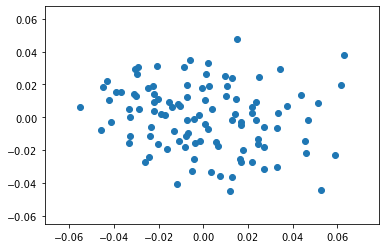

In [51]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt;
embedding = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=1, dissimilarity=['precomputed','euclidean'][1])
X_transformed = embedding.fit_transform(data,)
#plt.plot(X_transformed[:,0],X_transformed[:,1],'r.');
plt.scatter(X_transformed[:,0],X_transformed[:,1])

Text(0.5, 1.0, 'HDBSCAN clustering')

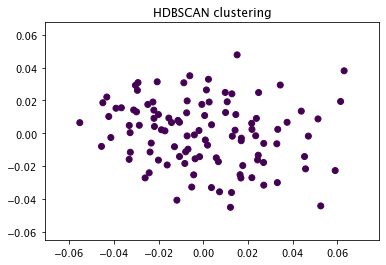

In [52]:
import hdbscan
clusterrer = hdbscan.HDBSCAN()
clusterrer.fit(data)
zdata = clusterrer.labels_
'{} cluster in data'.format(len(np.unique(zdata)))
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=zdata)
plt.title('HDBSCAN clustering')

In [53]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt;

def test_clusters(data):
    print('ndim={}'.format(data.shape[1]))
    embedding = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=1, dissimilarity='euclidean')
    X_transformed = embedding.fit_transform(data,)

    plt.figure(figsize=np.array((7,5))*1.5)

    plt.subplot(2,2,1);
    plt.scatter(X_transformed[:,0],X_transformed[:,1]);
    plt.title('Ground truth',fontsize=15);

    plt.subplot(2,2,2);
    star.fit(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=star.labels_);
    plt.title('Star clustering: {}'.format(len(np.unique(star.labels_))),fontsize=15);

    plt.subplot(2,2,3);
    model.fit(data);
    bnpz = model.predict(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=bnpz);
    plt.title('BNP clustering: {}'.format(len(np.unique(bnpz))),fontsize=15);

    plt.subplot(2,2,4);
    clusterrer = hdbscan.HDBSCAN();
    clusterrer.fit(data);
    plt.scatter(X_transformed[:,0],X_transformed[:,1],c=clusterrer.labels_);
    plt.title('HDBSCAN clustering: {}'.format(len(np.unique(clusterrer.labels_))),fontsize=15);

In [54]:
def get_tiny_C(C1):
    # Input cmats[:,0,:,:]
    nsubs=C0.shape[0]
    nnets = len(unets)
    C1_tiny=np.zeros((nsubs,nnets,nnets))
    for s in np.arange(nsubs):
        for i in np.arange(nnets):
            for j in np.arange(nnets):
                ridx=np.array(nets==unets[i])
                cidx=np.array(nets==unets[j])
                if i==j:
                    C1_tiny[s,i,j]=C1[:,ridx,:][:,:,cidx][s][np.triu_indices(sum(cidx),1)].mean()
                else:
                    C1_tiny[s,i,j]=C1[:,ridx,:][:,:,cidx][s].mean()
                    
    return C1_tiny

In [55]:
rnames = ['LH-Vis-EVC' ,'LH-SomMot-M1' ,'LH-DorsAttn-Post' ,'LH-DorsAttn-FEF' ,'LH-DorsAttn-PrCv' ,'LH-SalVentAttn-ParOper' ,'LH-SalVentAttn-TempOcc' ,'LH-SalVentAttn-FrOper' ,'LH-SalVentAttn-PFCl' ,'LH-SalVentAttn-Med' ,'LH-Limbic-OFC' ,'LH-Limbic-TempPole' ,'LH-Cont-Par' ,'LH-Cont-Temp' ,'LH-Cont-PFCd' ,'LH-Cont-PFCl' ,'LH-Cont-OFC' ,'LH-Cont-PFCv' ,'LH-Cont-pCun' ,'LH-Cont-Cing' ,'LH-Cont-PFCmp' ,'LH-Default-Par' ,'LH-Default-Temp' ,'LH-Default-PFC' ,'LH-Default-PCC' ,'LH-Default-PHC' ,'RH-Vis-EVC' ,'RH-SomMot-M1' ,'RH-DorsAttn-Post' ,'RH-DorsAttn-FEF' ,'RH-DorsAttn-PrCv' ,'RH-SalVentAttn-TempOccPar' ,'RH-SalVentAttn-PrC' ,'RH-SalVentAttn-FrOper' ,'RH-SalVentAttn-PFCv' ,'RH-SalVentAttn-PFCl' ,'RH-SalVentAttn-Med' ,'RH-Limbic-OFC' ,'RH-Limbic-TempPole' ,'RH-Cont-Par' ,'RH-Cont-Temp' ,'RH-Cont-PFCv' ,'RH-Cont-PFCl' ,'RH-Cont-pCun' ,'RH-Cont-Cing' ,'RH-Cont-PFCmp' ,'RH-Default-Par' ,'RH-Default-Temp' ,'RH-Default-PFCv' ,'RH-Default-PFCm' ,'RH-Default-PCC']
nets=[lbl.split('-')[1] for lbl in rnames];nets=np.array(nets)
unets = np.unique(nets)

In [56]:
P = proportionMat[:,50,:]
C0=cmats[:,0,:,:]
C1=cmats[:,50,:,:]

C0_tiny = get_tiny_C(cmats[:,0,:,:])
C50_tiny = get_tiny_C(cmats[:,50,:,:])

def flatten_C(input_C):
    nsubs = input_C.shape[0]
    ndim = input_C.shape[2]
    output_C = input_C[0,:,:][np.triu_indices(ndim,1)]
    for s in range(1,nsubs):
            output_C = np.vstack((output_C,input_C[s,:,:][np.triu_indices(ndim,1)]))
    return output_C

# Make P tiny
print(P.shape)
P_tiny = np.array([np.array(P[:,nets==net]).mean(axis=1) for net in unets]).transpose()
print(P_tiny.shape)

(106, 51)
(106, 7)


In [129]:
from sklearn import mixture
model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=106,covariance_type=['full','tied','diag' ,'spherical'][1],
                                      init_params='kmeans',tol=0.00001,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=.1,mean_precision_prior=None)



ndim=51


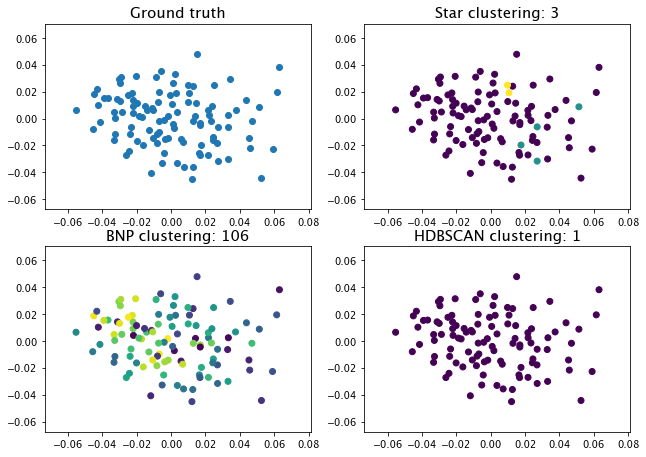

In [207]:
data = proportionMat[:,50,:]
test_clusters(data)

ndim=1275


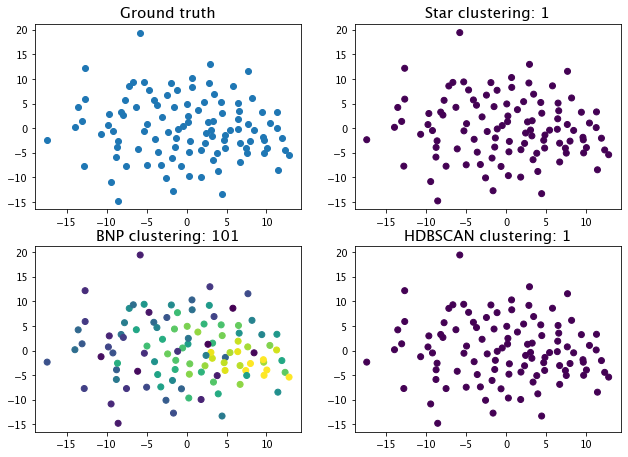

In [204]:
data = conn[:,50,:]
test_clusters(data)

ndim=7


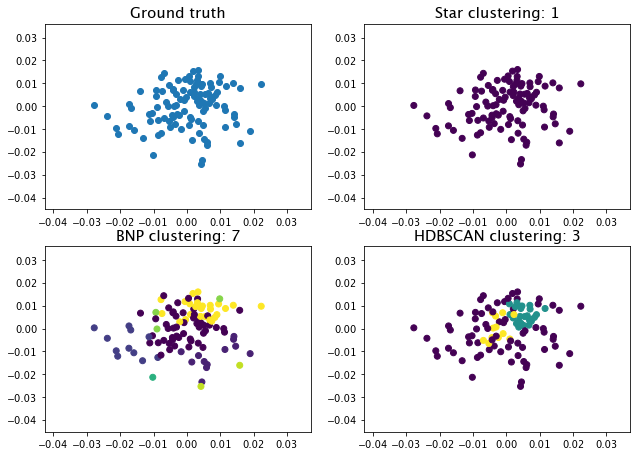

In [188]:
data = P_tiny
test_clusters(data)

(array([1., 0., 1., 0., 0., 0., 0., 5., 0., 3.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <a list of 10 Patch objects>)

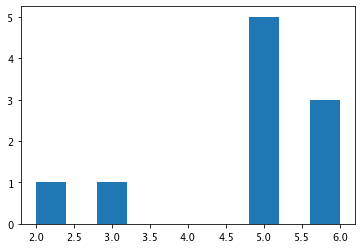

In [190]:
nz = [len(np.unique(model.fit_predict(data))) for _ in range(10)]
plt.hist(nz)

ndim=21


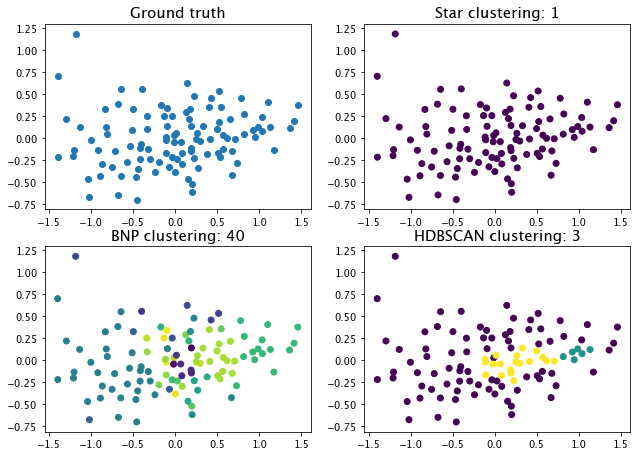

In [202]:
test_clusters(flatten_C(get_tiny_C(cmats[:,50,:,:])))

ndim=7


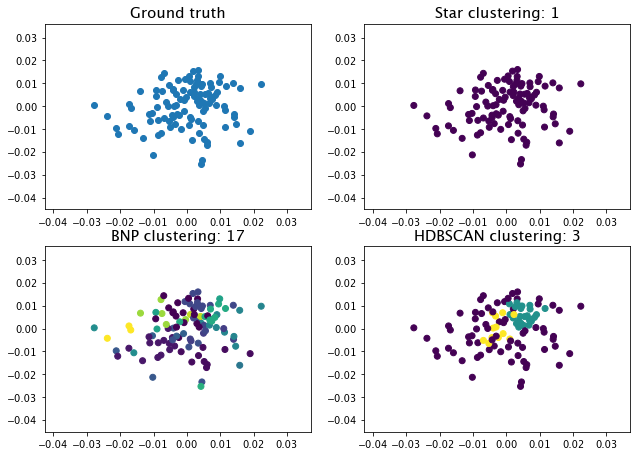

In [219]:
from sklearn import mixture
model = mixture.BayesianGaussianMixture(max_iter=100000,
                                      n_components=106,covariance_type=['full','tied','diag' ,'spherical'][1],
                                      init_params='kmeans',tol=0.00001,
                                      weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=.1,mean_precision_prior=None)

data = P_tiny
test_clusters(data)

z = model.fit_predict(data)

In [321]:
df.columns

Index(['index', 'BIDS ID', 'SVIP ID', 'FCAP1', 'SCAP1', 'SCAP2', 'ados_css',
       'ados_module', 'age_months', 'best_full_scale_iq', 'best_nonverbal_iq',
       'best_verbal_iq', 'clinical_asd_dx', 'collection', 'date_of_evaluation',
       'eval_age_months', 'family', 'family_type', 'father',
       'genetic_status_16p', 'genetic_status_1q', 'genetic_status_info_source',
       'htwhc.bmi', 'htwhc.bmi_z_score', 'htwhc.head_circum_1',
       'htwhc.head_circum_2', 'htwhc.head_circum_3', 'htwhc.head_circum_final',
       'htwhc.head_circum_z_score', 'htwhc.height', 'htwhc.height_z_score',
       'htwhc.measure.eval_age_months', 'htwhc.measure.measure_type',
       'htwhc.role', 'htwhc.weight', 'htwhc.weight_z_score',
       'included_in_longitudinal_dataset', 'individual.family',
       'inheritance_information', 'inherited_status_info_source',
       'initial_clinical_asd_dx', 'latest_clinical_asd_dx', 'measure_type',
       'mother', 'relationship_to_iip', 'rrb_css', 'sa_css', 'sex'

array(['0', '1', '[]'], dtype=object)

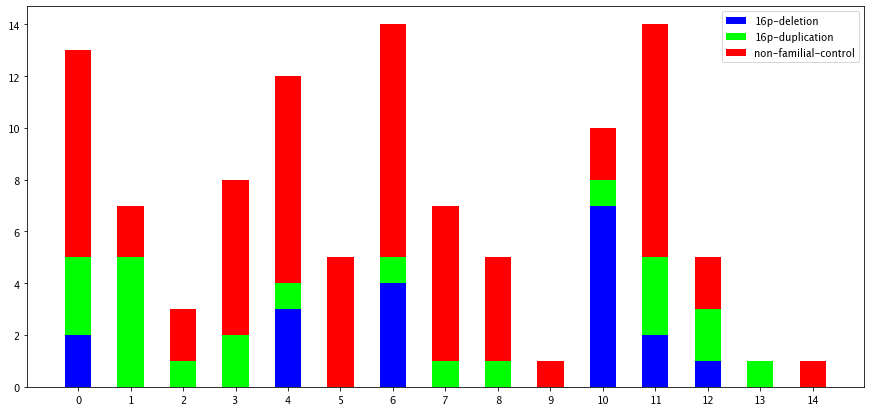

In [352]:
cids = np.unique(z)
nclust = len(cids)
arr = np.array(df['family_type'])
#arr = np.array(df['sex'])
uvals = np.unique(arr)
mat = np.zeros((nclust,len(uvals)))
for c in range(nclust):
    cid = cids[c]
    mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
mat

plt.figure(figsize=(15,7))
for i in range(nclust):
    x = i
    y = mat[x,:]
    plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
    
plt.legend(uvals);
plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

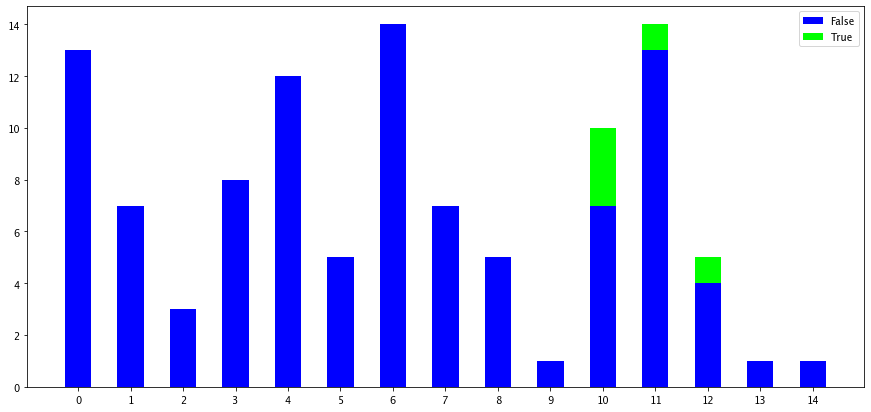

In [355]:
cids = np.unique(z)
nclust = len(cids)

#arr = np.array(df['initial_clinical_asd_dx'])
#arr = np.array(df['sex'])
uvals = np.unique(arr)
mat = np.zeros((nclust,len(uvals)))
for c in range(nclust):
    cid = cids[c]
    mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
mat

plt.figure(figsize=(15,7))
for i in range(nclust):
    x = i
    y = mat[x,:]
    #plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
    plt.stackplot((x,x+.5),y[0],y[1],colors=((0,0,1),(0,1,0),(1,0,0)))
    
plt.legend(uvals);
plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

In [383]:
def get_zval_mat(z,arr):
    cids = np.unique(z)
    nclust = len(cids)
    #arr = np.array(df['family_type'])
    #arr = np.array(df['sex'])
    uvals = np.unique(arr)
    mat = np.zeros((nclust,len(uvals)))
    for c in range(nclust):
        cid = cids[c]
        mat[c,:] = np.array([np.array(arr[z==cid]==uval).sum() for uval in uvals]) 
    return mat
    
def plot_clustStacked(mat,arr):
    plt.figure(figsize=(15,7))
    for i in range(nclust):
        x = i
        y = mat[x,:]
        
        
        if mat.shape[1]==2:
            plt.stackplot((x,x+.5),y[0],y[1],colors=((0,0,1),(0,1,0),(1,0,0)))
        elif mat.shape[1]==3: 
            plt.stackplot((x,x+.5),y[0],y[1],y[2],colors=((0,0,1),(0,1,0),(1,0,0)))
                    
    uvals = np.unique(arr)            
    plt.legend(uvals);1
    plt.xticks(np.arange(nclust)+.25,labels=np.arange(nclust));

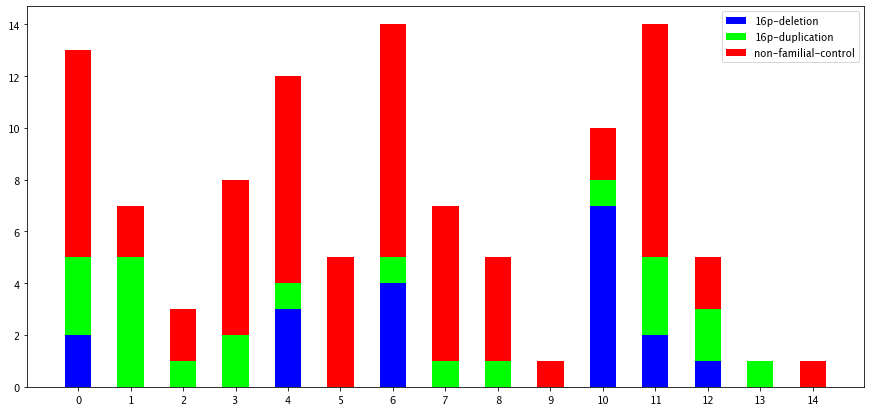

In [385]:
arr = np.array(df['family_type']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

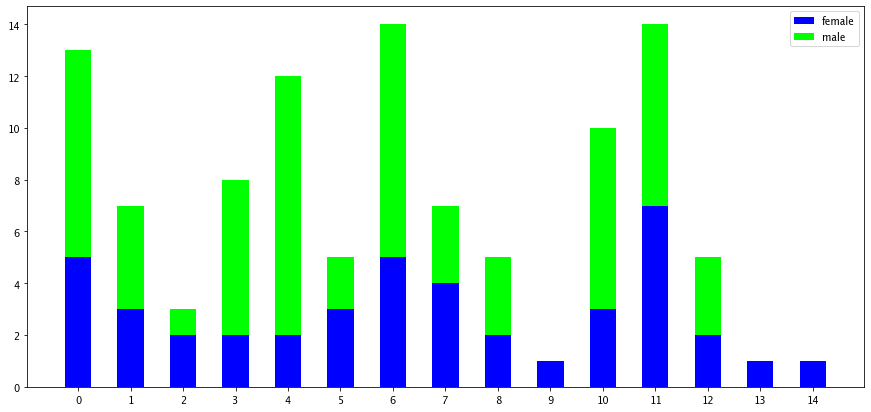

In [386]:
arr = np.array(df['sex']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

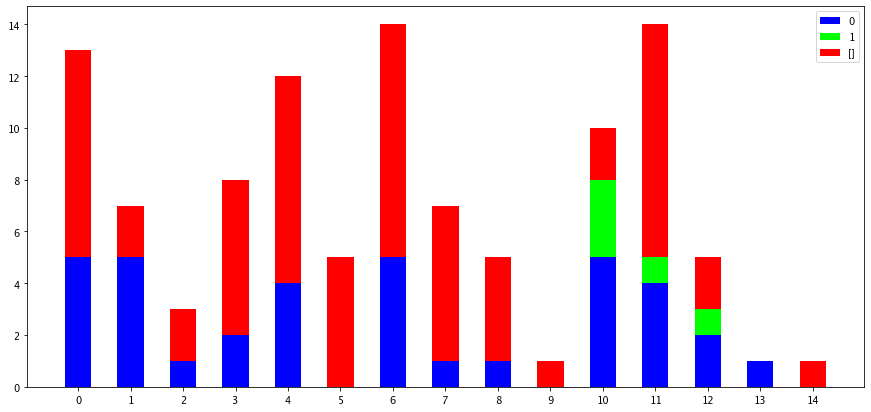

In [387]:
arr = np.array(df['clinical_asd_dx']);arr
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)

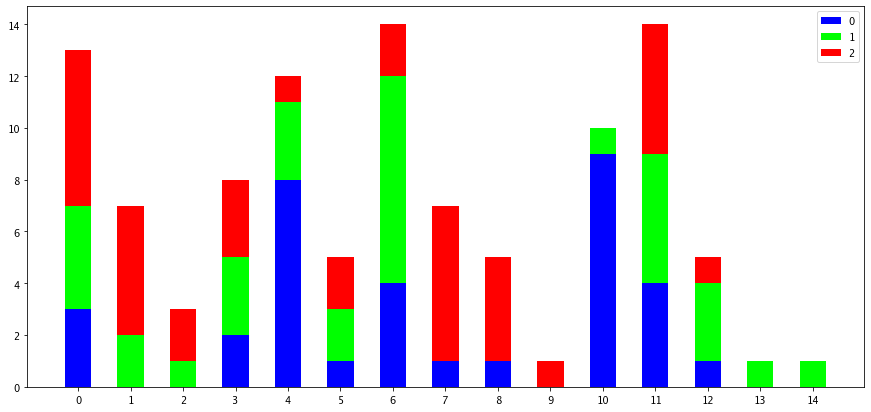

In [426]:
arr = np.digitize(np.array(df['age_years']),[15,34])
mat = get_zval_mat(z,arr);mat
plot_clustStacked(mat,arr)